# 支持向量机SVM（Support Vector Machine）

## 【关键词】支持向量，最大几何间隔

## 一、支持向量机的原理

Support Vector Machine。支持向量机，其含义是通过支持向量运算的分类器。其中“机”的意思是机器，可以理解为分类器。
那么什么是支持向量呢？在求解的过程中，会发现只根据部分数据就可以确定分类器，这些数据称为支持向量。
见下图，在一个二维环境中，其中点R，S，G点和其它靠近中间黑线的点可以看作为支持向量，它们可以决定分类器，也就是黑线的具体参数。

![](./img1/1.png)

## 二、实战

### 1、画出决策边界

导包sklearn.svm

随机生成数据，并且进行训练

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [3]:
# 接下来要对 两堆数据进行分类
# svm是支持向量机 
from sklearn.svm import SVC  # SVC是支持向量机的分类模型 SVR是支持向量机的回归模型

In [15]:
# 产生两堆数据
# 每堆数据 有20个样本 每个样本有2个特征  20行2列

np.random.seed(0)  # 之前用0这个种子产生的随机数 演示效果比较好 我这里就定了 大家可以完全随机产生
# demo = np.random.randn(200,2) - [1,2]  # 以0为中心 标准差是1的 一堆正太分布的数据
# 两堆数据 的中心 我想让他们分开 
# np.random.randn(20,2)-[2,2]
# demo
dot1 = np.random.randn(20,2)-[1,4]
dot2 = np.random.randn(20,2)+[2,3]

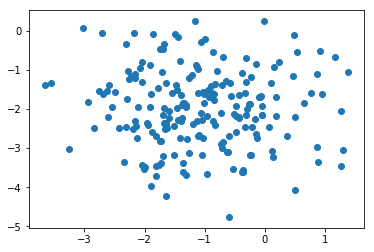

In [14]:
plt.scatter(demo[:,0],demo[:,1])

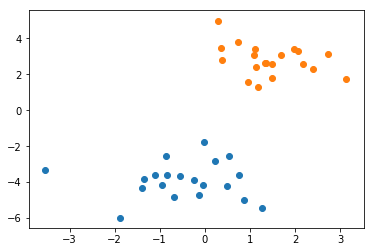

In [17]:
plt.scatter(dot1[:,0],dot1[:,1])
plt.scatter(dot2[:,0],dot2[:,1])

In [22]:
# 两堆数据 加起来 是我们的训练数据 X_train
X_train = np.concatenate((dot1,dot2))
X_train

array([[ 0.76405235, -3.59984279],
       [-0.02126202, -1.7591068 ],
       [ 0.86755799, -4.97727788],
       [-0.04991158, -4.15135721],
       [-1.10321885, -3.5894015 ],
       [-0.85595643, -2.54572649],
       [-0.23896227, -3.87832498],
       [-0.55613677, -3.66632567],
       [ 0.49407907, -4.20515826],
       [-0.6869323 , -4.85409574],
       [-3.55298982, -3.3463814 ],
       [-0.1355638 , -4.74216502],
       [ 1.26975462, -5.45436567],
       [-0.95424148, -4.18718385],
       [ 0.53277921, -2.53064123],
       [-0.84505257, -3.62183748],
       [-1.88778575, -5.98079647],
       [-1.34791215, -3.84365103],
       [ 0.23029068, -2.79762015],
       [-1.38732682, -4.30230275],
       [ 0.95144703,  1.57998206],
       [ 0.29372981,  4.9507754 ],
       [ 1.49034782,  2.5619257 ],
       [ 0.74720464,  3.77749036],
       [ 0.38610215,  2.78725972],
       [ 1.10453344,  3.3869025 ],
       [ 1.48919486,  1.81936782],
       [ 1.97181777,  3.42833187],
       [ 2.06651722,

In [25]:
# dot1的目标值是0 dot2的目标值是1 则y_train中前面20个是0 后面20个是1
# 构造一个y_train
y_train = [0]*20 + [1]*20
y_train

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

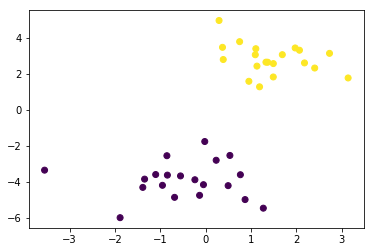

In [28]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [29]:
#  'linear', 'poly', 'rbf'
svc = SVC(kernel='linear')

In [30]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
X_train

array([[ 0.76405235, -3.59984279],
       [-0.02126202, -1.7591068 ],
       [ 0.86755799, -4.97727788],
       [-0.04991158, -4.15135721],
       [-1.10321885, -3.5894015 ],
       [-0.85595643, -2.54572649],
       [-0.23896227, -3.87832498],
       [-0.55613677, -3.66632567],
       [ 0.49407907, -4.20515826],
       [-0.6869323 , -4.85409574],
       [-3.55298982, -3.3463814 ],
       [-0.1355638 , -4.74216502],
       [ 1.26975462, -5.45436567],
       [-0.95424148, -4.18718385],
       [ 0.53277921, -2.53064123],
       [-0.84505257, -3.62183748],
       [-1.88778575, -5.98079647],
       [-1.34791215, -3.84365103],
       [ 0.23029068, -2.79762015],
       [-1.38732682, -4.30230275],
       [ 0.95144703,  1.57998206],
       [ 0.29372981,  4.9507754 ],
       [ 1.49034782,  2.5619257 ],
       [ 0.74720464,  3.77749036],
       [ 0.38610215,  2.78725972],
       [ 1.10453344,  3.3869025 ],
       [ 1.48919486,  1.81936782],
       [ 1.97181777,  3.42833187],
       [ 2.06651722,

#### 超平面公式

f(x) = w*x + b

提取系数获取斜率

In [57]:
# coef_ 系数 也就是 权重 之所以有两个 是 因为 他们分别是 第一个特征的权重 和 第二个特征的权重
# 第一个权重w0 是 y_train/X_train[:,0]  第二个权重w1 是 y_train/X_train[:,1]
# 现在要求的 是 把 X_train[:,0]是横轴 X_train[:,1]是纵轴 求权重  X_train[:,1]/X_train[:,0]
# w0 = (y_train/X_train[:,0])
# w1 = (y_train/X_train[:,1])
# w0/w1 = (X_train[:,1]/X_train[:,0])
svc.coef_
svc.coef_[0,0]
svc.coef_[0,1]
w = -svc.coef_[0,0]/svc.coef_[0,1]
w
# 先放这里 一会看看效果 再调整

-0.39834677343333186

线性方程的截距

f(x) = wx + b，期中b就是函数f(x)截距,即函数线与y轴的交点的值

- 函数的截距可以使用svc.intercept_方法得到

In [65]:
svc.intercept_  # 这里的截距 是 在y_train上的截距
# 现在要计算的是x1上的截距
# X_train[:,1]和y_train的 斜率是 w1 svc.coef_[0,1]
# w1已知 在y_train上的截距也是已知的 求在X_train[:,1]上的截距
# svc.intercept_/-??? = svc.coef_[0,1]
# ??? = -svc.intercept_/svc.coef_[0,1] 
b = -svc.intercept_[0]/svc.coef_[0,1]
b

-0.010539844074062357

确定一个x轴的区间，取x_train中的最大值和最小值为边界，计算y值，y = 斜率*x + 截距

绘制出分割线

In [48]:
# x是画线的范围
x = np.linspace(-4,4,100)

In [66]:
y = w*x+b
y

array([ 1.58284725,  1.55065761,  1.51846797,  1.48627833,  1.4540887 ,
        1.42189906,  1.38970942,  1.35751978,  1.32533014,  1.29314051,
        1.26095087,  1.22876123,  1.19657159,  1.16438195,  1.13219231,
        1.10000268,  1.06781304,  1.0356234 ,  1.00343376,  0.97124412,
        0.93905448,  0.90686485,  0.87467521,  0.84248557,  0.81029593,
        0.77810629,  0.74591665,  0.71372702,  0.68153738,  0.64934774,
        0.6171581 ,  0.58496846,  0.55277883,  0.52058919,  0.48839955,
        0.45620991,  0.42402027,  0.39183063,  0.359641  ,  0.32745136,
        0.29526172,  0.26307208,  0.23088244,  0.1986928 ,  0.16650317,
        0.13431353,  0.10212389,  0.06993425,  0.03774461,  0.00555498,
       -0.02663466, -0.0588243 , -0.09101394, -0.12320358, -0.15539322,
       -0.18758285, -0.21977249, -0.25196213, -0.28415177, -0.31634141,
       -0.34853105, -0.38072068, -0.41291032, -0.44509996, -0.4772896 ,
       -0.50947924, -0.54166888, -0.57385851, -0.60604815, -0.63

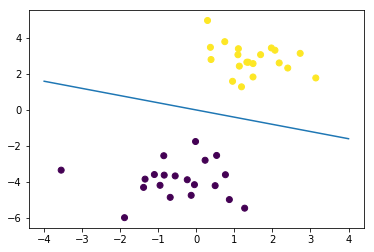

In [67]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.plot(x,y)

使用svc.support_vectors_找出支持向量，即离分割线最近的点集合，绘制出支持向量的所有点

In [70]:
svevtor = svc.support_vectors_
svevtor

array([[-0.02126202, -1.7591068 ],
       [ 1.18685372,  1.2737174 ]])

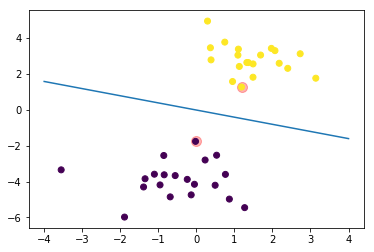

In [80]:
plt.scatter(svevtor[:,0],svevtor[:,1],c='r',alpha=0.3,s=100)  # 支持向量
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)  # 所有点
plt.plot(x,y)

绘制两条线，分别经过支持向量的第一个点和最后一个点，即查看分割线两边的通过支持向量的平行线

In [ ]:
# 已知 斜率 和 经过的点 画线
# 把两个直线的 b求出来 即可 b1 b2

In [81]:
svevtor

array([[-0.02126202, -1.7591068 ],
       [ 1.18685372,  1.2737174 ]])

In [84]:
p1 = svevtor[0]
p1

array([-0.02126202, -1.7591068 ])

In [87]:
p2 = svevtor[1]
p2

array([1.18685372, 1.2737174 ])

In [86]:
# b1
# y1 = w*x+b1
# 比如 已知点p1[x,y]
# ? = p1[1]-w*p1[0]
b1 = p1[1]-w*p1[0]
b1

-1.7675764562267091

In [88]:
b2 = p2[1]-w*p2[0]
b2

1.7464967467532686

绘制图形

In [91]:
x

array([-4.        , -3.91919192, -3.83838384, -3.75757576, -3.67676768,
       -3.5959596 , -3.51515152, -3.43434343, -3.35353535, -3.27272727,
       -3.19191919, -3.11111111, -3.03030303, -2.94949495, -2.86868687,
       -2.78787879, -2.70707071, -2.62626263, -2.54545455, -2.46464646,
       -2.38383838, -2.3030303 , -2.22222222, -2.14141414, -2.06060606,
       -1.97979798, -1.8989899 , -1.81818182, -1.73737374, -1.65656566,
       -1.57575758, -1.49494949, -1.41414141, -1.33333333, -1.25252525,
       -1.17171717, -1.09090909, -1.01010101, -0.92929293, -0.84848485,
       -0.76767677, -0.68686869, -0.60606061, -0.52525253, -0.44444444,
       -0.36363636, -0.28282828, -0.2020202 , -0.12121212, -0.04040404,
        0.04040404,  0.12121212,  0.2020202 ,  0.28282828,  0.36363636,
        0.44444444,  0.52525253,  0.60606061,  0.68686869,  0.76767677,
        0.84848485,  0.92929293,  1.01010101,  1.09090909,  1.17171717,
        1.25252525,  1.33333333,  1.41414141,  1.49494949,  1.57

In [92]:
y1 = w*x+b1

In [93]:
y2 = w*x+b2

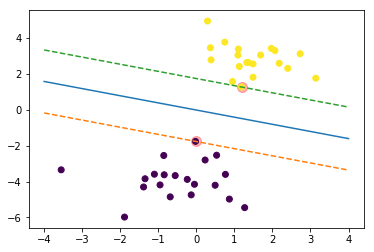

In [95]:
plt.scatter(svevtor[:,0],svevtor[:,1],c='r',alpha=0.3,s=100)  # 支持向量
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)  # 所有点
plt.plot(x,y)  # 分类的中心线
# 分类的上边界 和 下边界
plt.plot(x,y1,ls='--')
plt.plot(x,y2,ls='--')

### 2、使用多种核函数对iris数据集进行分类

导包

In [96]:
from sklearn.datasets import load_iris

In [97]:
iris = load_iris()

提取数据只提取两个特征，方便画图  
创建支持向量机的模型：'linear', 'poly'(多项式), 'rbf'(Radial Basis Function:基于半径函数),

In [98]:
data = iris.data[:,:2]
target = iris.target

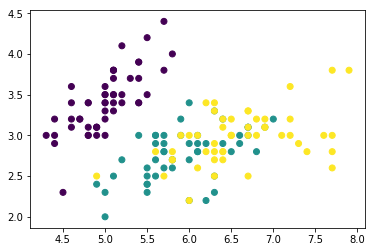

In [100]:
plt.scatter(data[:,0],data[:,1],c=target)

训练模型

In [102]:
l = SVC(kernel='linear')
r = SVC(kernel='rbf')  # 二次曲线
p = SVC(kernel='poly')  # 高次曲线


In [104]:
l.fit(data,target)
r.fit(data,target)
p.fit(data,target)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

图片背景点

In [115]:
x = np.linspace(data[:,0].min(),data[:,0].max(),200)
y = np.linspace(data[:,1].min(),data[:,1].max(),200)

xx,yy =np.meshgrid(x,y)

X_test = np.c_[xx.flatten(),yy.flatten()]


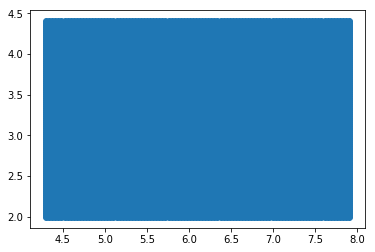

In [111]:
plt.scatter(X_test[:,0],X_test[:,1])

预测并绘制图形

In [116]:
y1_ = l.predict(X_test)  # 用linear内核做预测
y2_ = r.predict(X_test)  # 用rbf内核做预测
y3_ = p.predict(X_test)  # 用poly内核做预测

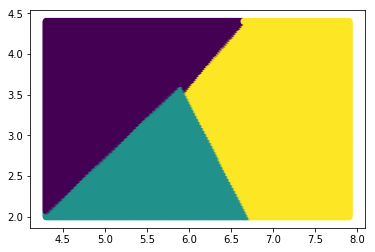

In [117]:
plt.scatter(X_test[:,0],X_test[:,1],c=y1_)

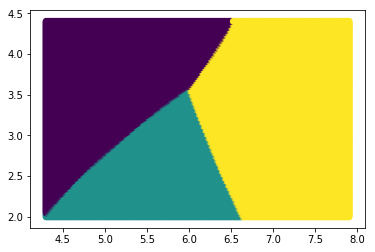

In [118]:
plt.scatter(X_test[:,0],X_test[:,1],c=y2_)

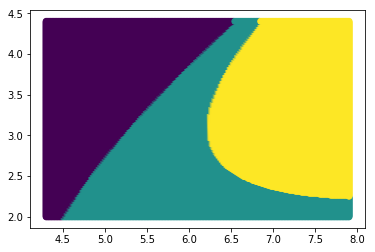

In [119]:
plt.scatter(X_test[:,0],X_test[:,1],c=y3_)

In [4]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

### 3、使用SVM多种核函数进行回归

导包

In [2]:
# SVC 是 分类的 SVR是回归的
from sklearn.svm import SVR  # 回归

自定义样本点rand，并且生成sin函数曲线

In [8]:
x = np.linspace(-np.pi,np.pi,40)
y = np.sin(x)

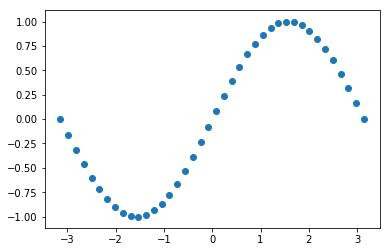

In [9]:
plt.scatter(x,y)

数据加噪

In [14]:
noise = np.random.random(10) - 0.5  # [-0.5, 0.5)
noise

array([-0.08118081,  0.47018073, -0.09643034, -0.43049241,  0.49845096,
       -0.44342468,  0.48995822, -0.4866555 , -0.25955192,  0.10404031])

In [16]:
y.shape
y[::4]+=noise

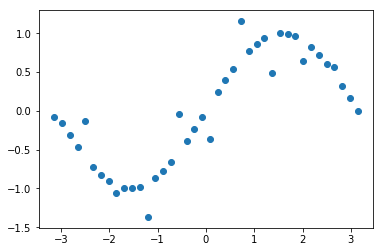

In [18]:
plt.scatter(x,y)

建立模型，训练数据，并预测数据，预测训练数据就行

In [20]:
# 这里是回归模型 用的是 SVR
# 获取模型
l = SVR(kernel='linear')
r = SVR(kernel='rbf')
p = SVR(kernel='poly')

In [22]:
# 训练模型
l.fit(x.reshape(-1,1),y)
r.fit(x.reshape(-1,1),y)
p.fit(x.reshape(-1,1),y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
# 生成一些测试的X_test
X_test = np.linspace(-np.pi,np.pi,15).reshape(-1,1)
X_test

array([[-3.14159265],
       [-2.6927937 ],
       [-2.24399475],
       [-1.7951958 ],
       [-1.34639685],
       [-0.8975979 ],
       [-0.44879895],
       [ 0.        ],
       [ 0.44879895],
       [ 0.8975979 ],
       [ 1.34639685],
       [ 1.7951958 ],
       [ 2.24399475],
       [ 2.6927937 ],
       [ 3.14159265]])

In [29]:
# 预测 X_teset
y1_ = l.predict(X_test)
y2_ = r.predict(X_test)
y3_ = p.predict(X_test)

绘制图形，观察三种支持向量机内核不同

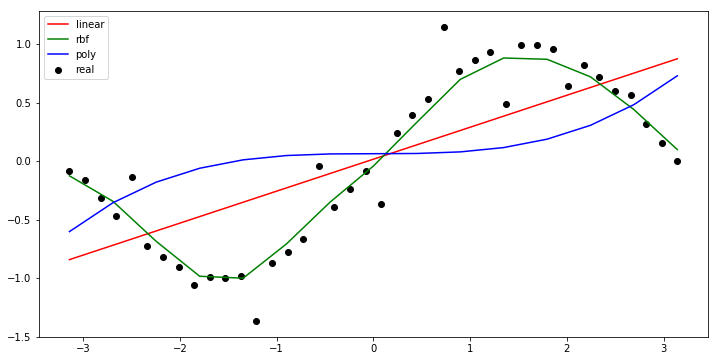

In [38]:
plt.figure(figsize=(12,6))
plt.scatter(x,y,c='k',label='real')
plt.plot(X_test,y1_,c='r',label='linear')  # linear内核
plt.plot(X_test,y2_,c='g',label='rbf')   # 二次曲线
plt.plot(X_test,y3_,c='b',label='poly')   # 高次曲线
plt.legend()